# Data Analytics Intern @LGM Virtual Internship 2021
NAME - BHAWNA BOTHRA

TASK 2 (Intermediate LEVEL TASK)

2) Prediction using Decision Tree  Algorithm :

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Reading Data

In [2]:
iris_dataset=pd.read_csv(r'C:\Users\bhawn\Downloads\Iris.csv')

In [3]:
#Printing first 5 rows of a dataset
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Printing last 5 rows of a dataset
iris_dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#Printing the shape of a dataset
iris_dataset.shape

(150, 6)

In [6]:
#Dropping 'Id' column
iris_dataset.drop("Id",axis=1,inplace=True)

In [7]:
#After dropping 'Id' column printing the shape of a datset
iris_dataset.shape

(150, 5)

# Pre-Processing

In [8]:
X=iris_dataset.drop("Species",axis=1)
X[0:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y=iris_dataset["Species"]
Y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# Setting up the Decision Tree

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [11]:
X_train.shape
y_train.shape

(120,)

In [12]:
X_test.shape
y_test.shape

(30,)

# Modeling

In [13]:
Species_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [14]:
Species_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Prediction

In [15]:
prediction=Species_tree.predict(X_test)

In [16]:
print(prediction[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor']
38         Iris-setosa
66     Iris-versicolor
115     Iris-virginica
117     Iris-virginica
89     Iris-versicolor
Name: Species, dtype: object


# Evaluation

In [17]:
#Accuracy Check
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction))

DecisionTrees's Accuracy:  1.0


# Visualization

In [18]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

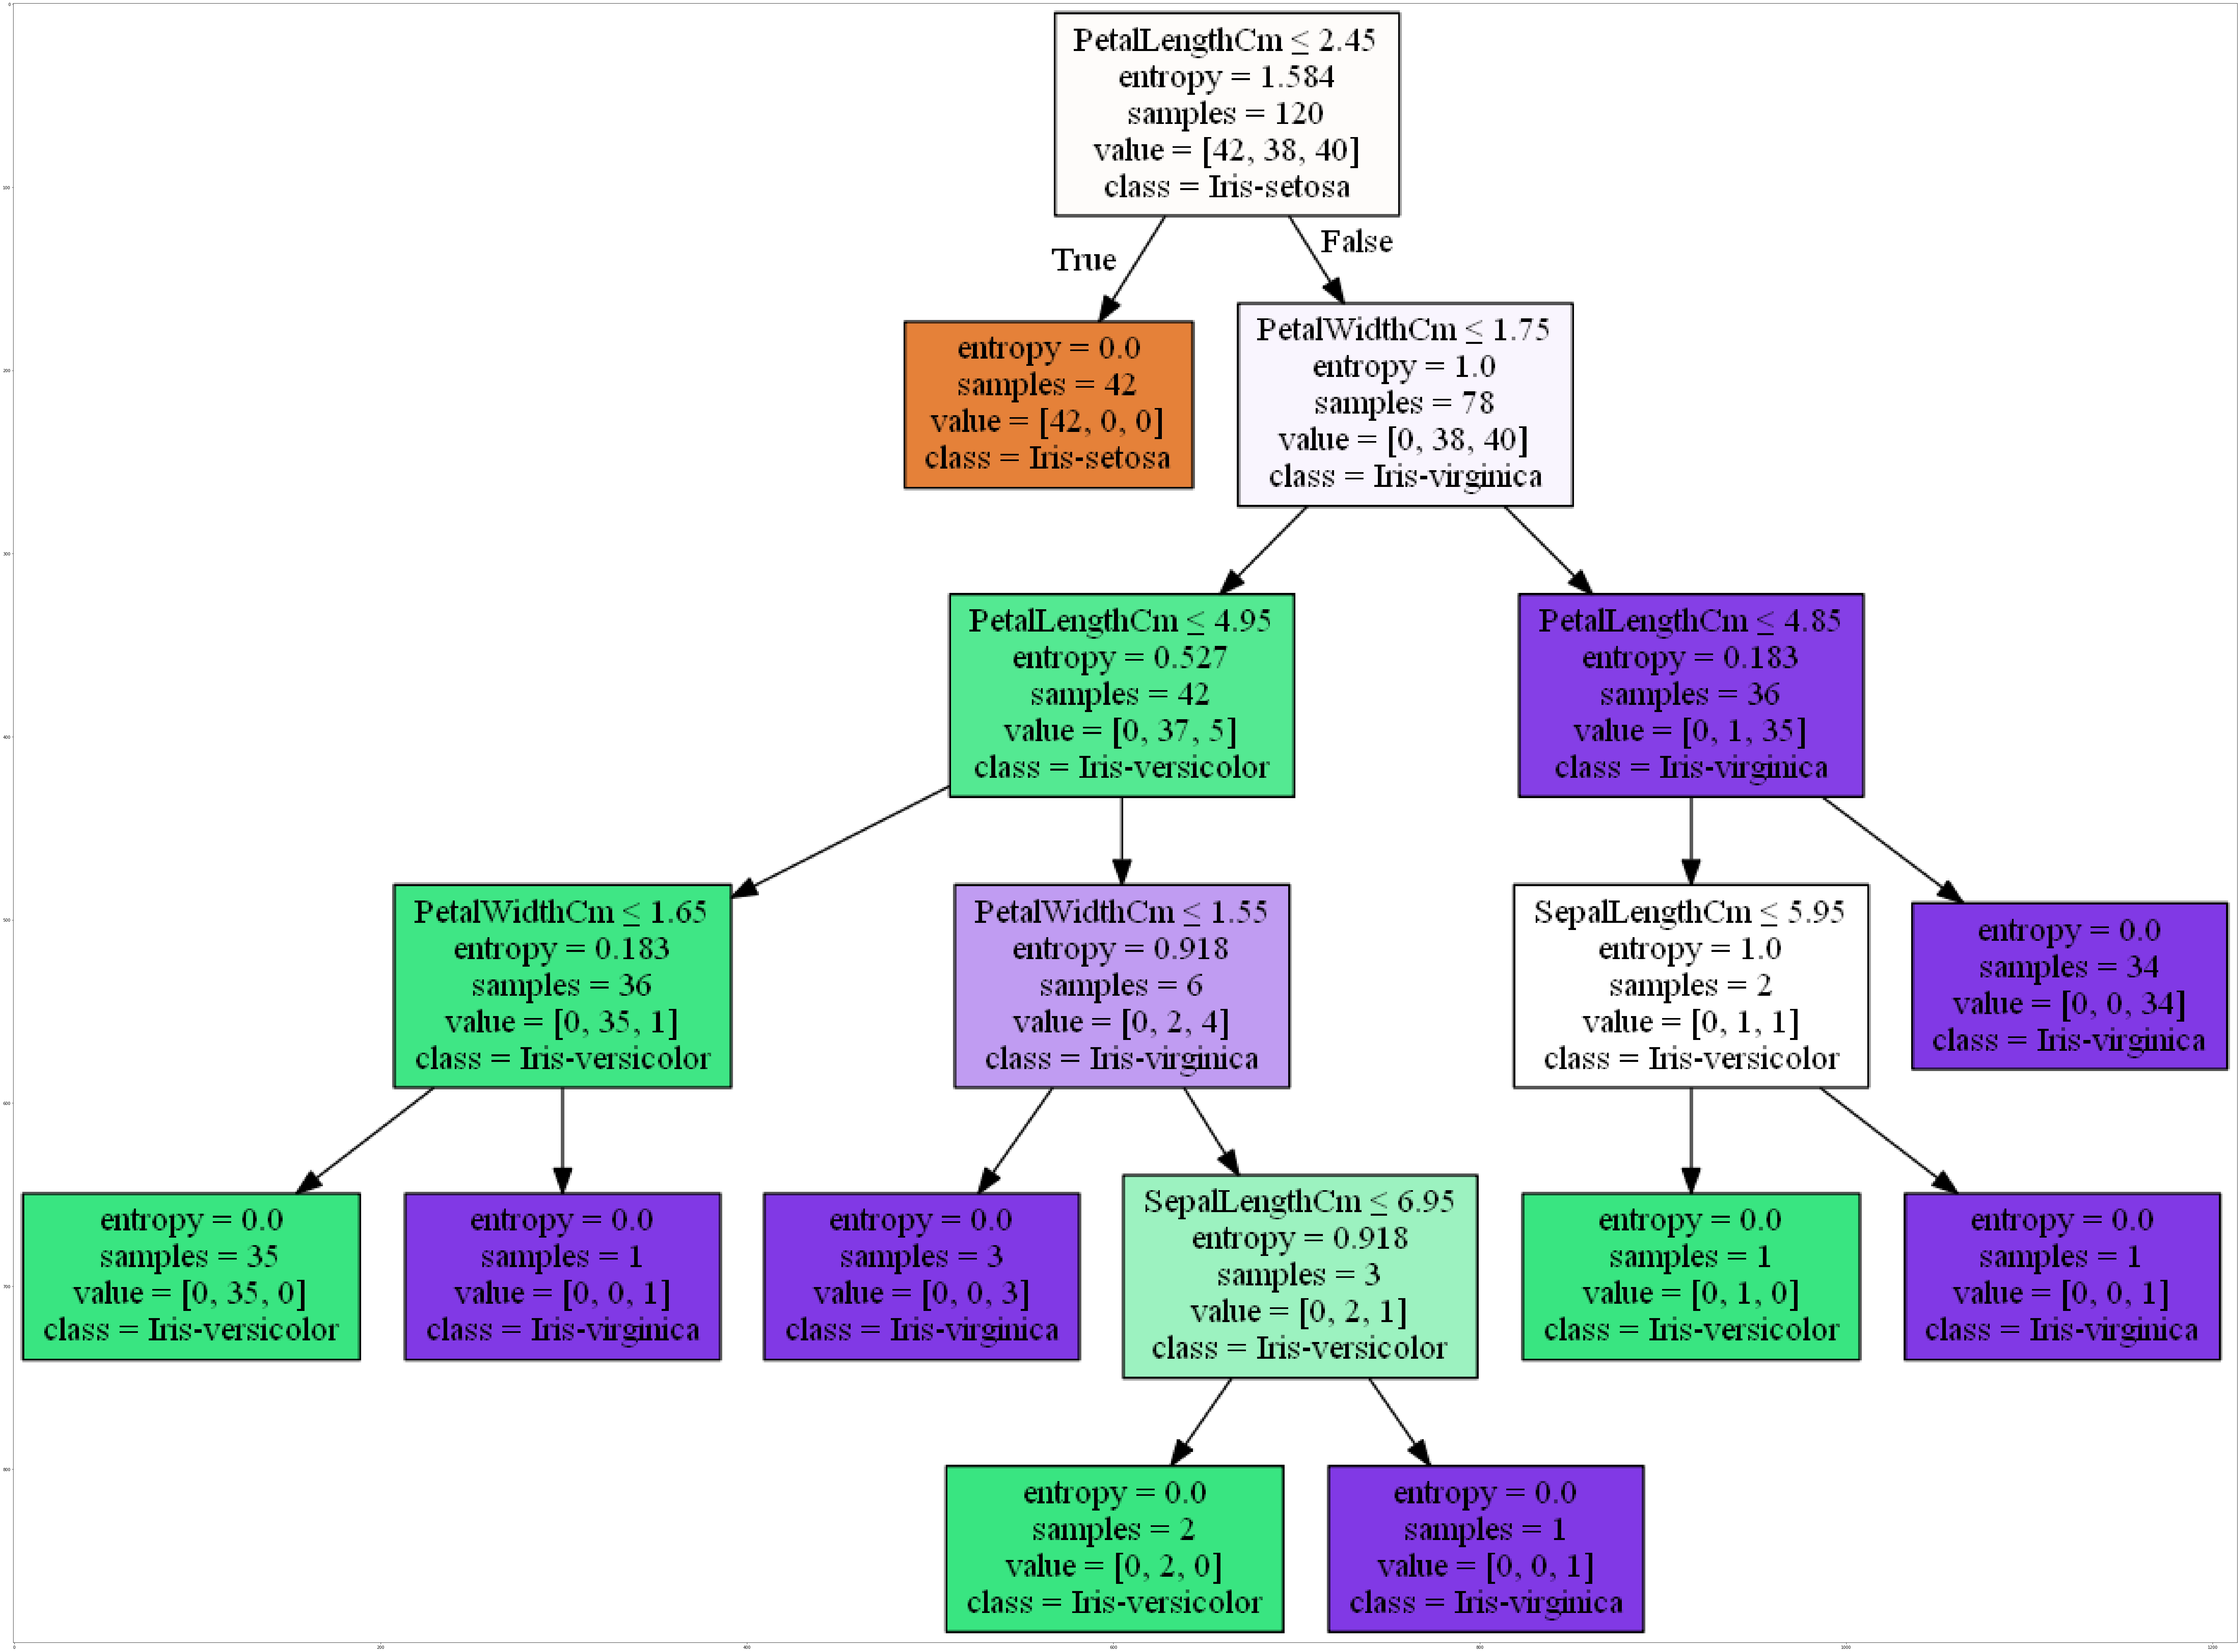

In [20]:
#Printing the Decision Tree
dot_data = StringIO()
filename = "Speciestree.png"
featureNames = iris_dataset.columns[0:4]
targetNames = iris_dataset["Species"].unique().tolist()
out=tree.export_graphviz(Species_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')